In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import psycopg2 as pg
%matplotlib inline
import seaborn as sns
import dbcreds

In [2]:
conn = pg.connect(dbname = dbcreds.database, host=dbcreds.host, user=dbcreds.user, password = dbcreds.password)

In [3]:
def generate_df(schema, table_list, conn):
    df_dict = {}
    for table in table_list:
        df_dict[table] = pd.read_sql('select * from '+schema+'.'+table, con=conn)
    return df_dict

In [4]:
# read all csvs and return as dataframes

df_dict = generate_df('IEFP',['applications','cancellations','category_changes','convocations','interventions','interviews'], conn)

In [5]:
# name dataframes

apps_df = df_dict['applications']
cancel_df = df_dict['cancellations']
cat_changes_df = df_dict['category_changes']
convocation_df = df_dict['convocations']
interventions_df = df_dict['interventions']
interviews_df = df_dict['interviews']

In [6]:
def add_row_number_as_id(data_frame):
    data_frame["index"]=range(1,data_frame.shape[0]+1,1)
    
def add_event_data(iefp_data_frame,event_data_frame,event_type):
    curr_event_df=event_data_frame.filter(["ute_id","anomes","index"], axis=1)
    curr_event_df.rename(columns={"anomes":"date"},inplace=True)
    curr_event_df["event_type"]=event_type
    return iefp_data_frame.append(curr_event_df, ignore_index=True)

In [7]:
event_data_frames=[apps_df,cancel_df,cat_changes_df,convocation_df,interventions_df,interviews_df]

In [8]:
#adding indexes to the datafiles
for x in range(len(event_data_frames)):
    event_data_frames[x]=add_row_number_as_id(event_data_frames[x])
cancel_df.rename(columns={"id":"ute_id"},inplace=True)

In [9]:
#adding the seperate events to one datfile
iefp_data_frame=pd.DataFrame()
iefp_data_frame= add_event_data(iefp_data_frame,apps_df,"application")
print(type(iefp_data_frame["date"][0]))
iefp_data_frame= add_event_data(iefp_data_frame,cancel_df,"cancellation")
print(type(iefp_data_frame["date"][0]))
iefp_data_frame= add_event_data(iefp_data_frame,cat_changes_df,"category_change")
iefp_data_frame= add_event_data(iefp_data_frame,convocation_df,"convocation")
iefp_data_frame= add_event_data(iefp_data_frame,interviews_df,"interviews")
iefp_data_frame=iefp_data_frame.sort_values(["ute_id","date"])

<type 'numpy.int64'>
<type 'numpy.int64'>


In [ ]:
iefp_data_frame.rename(columns={"Ute-Id":"ute_id"},inplace=True)
application_id=0
previous_id=-10
iefp_data_frame["application_id"]=0
counter=0
for i in range(iefp_data_frame.shape[0]):
    counter+=1
    print type(iefp_data_frame["ute_id"][i])
    id=int(iefp_data_frame["ute_id"][i])
    if iefp_data_frame["event_type"][i]=="application" or id!=previous_id:
        application_id+=1
        previous_id=int(iefp_data_frame["ute_id"][i])
    iefp_data_frame["application_id"][i]=application_id

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>

/opt/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]



<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.int64'>
<type 'numpy.

In [12]:
# print num records and num unique IDs for each DF
def summary_stats(df):
    num_records = len(df)
    num_unique = df.ute_id.nunique()
    return num_records, num_unique
summary_stats(iefp_data_frame)
iefp_data_frame["ute_id"][0]

1058797

In [ ]:
application_id=0
previous_id=-10
iefp_data_frame["application_id"]=0
counter=0
for i in range(iefp_data_frame.shape[0]):
    counter+=1
    print type(iefp_data_frame["ute_id"][i])
    id=int(iefp_data_frame["ute_id"][i])
    if iefp_data_frame["event_type"][i]=="application" or id!=previous_id:
        application_id+=1
        previous_id=int(iefp_data_frame["ute_id"][i])
    iefp_data_frame["application_id"][i]=application_id

In [8]:
interviews_df.head()
#len(conv_df[conv_df['dtipo_convocatoria']=='OFERTA'])

,anomes,ctipo_movimento,dtipo_movimento,ute_id,apresentacao_resultado,dresultado_apresentacao,year,month
0,200701,37,RESULTADO APRESENTAÃÃES,1060922,22,RECUSA DE ENTIDADE EMPREGADORA - DESAJUSTAMENT...,2007,1
1,200701,37,RESULTADO APRESENTAÃÃES,1062047,10,ADMITIDO / COLOCADO,2007,1
2,200701,37,RESULTADO APRESENTAÃÃES,1062047,29,RECUSA ENTIDADE EMPREGADORA- OUTROSMOTIVOS,2007,1
3,200701,37,RESULTADO APRESENTAÃÃES,1080395,10,ADMITIDO / COLOCADO,2007,1
4,200701,37,RESULTADO APRESENTAÃÃES,1133828,21,RECUSA DE ENTIDADE EMPREGADORA - POSTO JÃ PRE...,2007,1


In [14]:
users_apresentado = (conv_df[(conv_df['dtipo_convocatoria']=='OFERTA') & (conv_df['dresultado_convocatoria']=='APRESENTADO')])

In [15]:
DataFrame(conv_df[conv_df['dtipo_convocatoria']=='OFERTA'].groupby('dresultado_convocatoria').ute_id.count().sort_values(ascending=False))

,ute_id
dresultado_convocatoria,
APRESENTADO,41781
NÃO APRESENTADO,12217
NÃO COMPARECEU INJUSTIFICADAMENTE,4010
ANULADA,1517
NÃO COMPARECEU JUSTIFICADAMENTE,293
NÃO COMPARECEU JUSTIFICADAMENTE - RESPOSTA AUTOMÃTICA,68
RECUSA INJUSTIFICADA - PROFISSÃO OFERECIDA,61
RECUSA JUSTIFICADA - PROFISSÃO OFERECIDA,25
RECUSA INJUSTIFICADA - OUTRAS RAZÃES,12


# Overview histograms for each data source

In [16]:
# exploratory histograms
# define function to print multiple histograms
def print_histograms (df):
    for x in df.columns:
        plt.figure()
        getattr(df,x).value_counts(dropna=False).plot(kind='bar', title=x, figsize = (10,3))

/opt/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


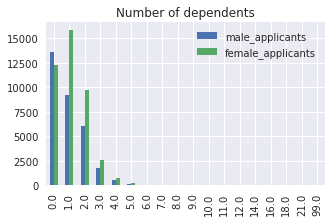

In [17]:
#print_histograms(cancel_df[['dmotivo_anulacao']])

#apps_df.dhabilitacao_escolar.value_counts().plot(kind='bar', figsize = (3,2), title="Top Years of Schooling")
male_dependents = DataFrame(apps_df[apps_df['sexo']=='M'].ute_nr_pessoas_cargo.value_counts()).rename(columns={'ute_nr_pessoas_cargo':'male_applicants'}) #.plot(kind='bar',xlim=(0,20), color='green')
female_dependents = DataFrame(apps_df[apps_df['sexo']=='F'].ute_nr_pessoas_cargo.value_counts()).rename(columns={'ute_nr_pessoas_cargo':'female_applicants'}) #.plot(kind='bar',xlim=(0,20),color='blue')
pd.concat([male_dependents,female_dependents],axis=1).plot(kind='bar', figsize=(5,3), title='Number of dependents')

#conv_df.dtipo_convocatoria.value_counts().sort_values().plot(
#    kind='barh', title="Top types of convocations \n", figsize = (3,5)).tick_params(labeltop='on', labelbottom='off')
#DataFrame(conv_df.groupby('dtipo_convocatoria').ute_id.count().sort_values(ascending=False))

#conv_df.dresultado_convocatoria.value_counts().sort_values().plot(
#    kind='barh', title="Top results of convocations \n", figsize = (3,5)).tick_params(labeltop='on', labelbottom='off')
#DataFrame(conv_df.groupby('dresultado_convocatoria').ute_id.count().sort_values(ascending=False))

#interviews_df.dresultado_apresentacao.value_counts().sort_values().plot(
#    kind='barh' ,title="top results of interviews\n", figsize = (3,5)).tick_params(labeltop='on', labelbottom='off')
#DataFrame(interviews_df.groupby('dresultado_apresentacao').ute_id.count().sort_values(ascending=False))

#interventions_df.intervencao_codigo_d.value_counts().sort_values(ascending=False)[0:5].plot(
#    kind='bar', title="top interventions\n", figsize = (5,3), rot=80, fontsize=11)
#DataFrame(interventions_df.groupby('intervencao_codigo_d').ute_id.count().sort_values(ascending=False))

#cancel_df.dmotivo_anulacao.value_counts().sort_values().plot(
#    kind='barh', title="top reasons for cancellations\n", figsize = (3,10)).tick_params(labeltop='on', labelbottom='off')
#DataFrame(cancel_df.groupby('dmotivo_anulacao').ute_id.count().sort_values(ascending=False))

In [18]:
#
#DataFrame(cat_changes_df.groupby(['previous_cat','new_cat']).ute_id.count().sort_values(ascending=False))

# Additional overview visualizations

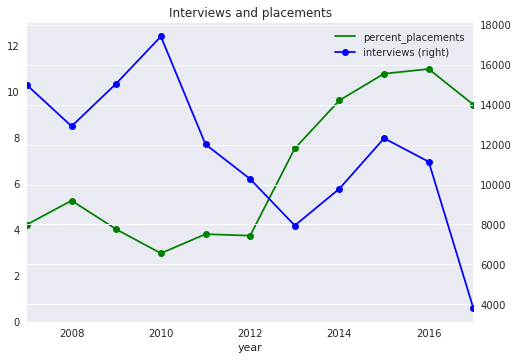

In [19]:
#plot number of interviews and % that were placements
all_int = DataFrame(interviews_df.groupby('year').ute_id.count()).rename(columns={'ute_id':'interviews'}) #.plot(kind='bar', fontsize=16, figsize=(5,4), title="Number of interviews by year")
placements = DataFrame(interviews_df[interviews_df['dresultado_apresentacao']=='ADMITIDO / COLOCADO'].groupby('year').ute_id.count()).rename(columns={'ute_id':'placements'}) #.plot(kind='bar', fontsize=16, figsize=(5,4), title="Number of placements by year")
int_placements = pd.concat([all_int,placements],axis=1)
int_placements['percent_placements'] = int_placements['placements']/int_placements['interviews']*100

int_placements.percent_placements.plot(marker = 'o', style='green', title = 'Interviews and placements', legend = True, ylim = (0,13))
int_placements.interviews.plot(marker = 'o',style = 'blue', secondary_y=True, legend=True, ylim = (0,13))

# Outcome labeling

In [20]:
# Count applications between 2007-2015
app_range = apps_df[apps_df['year'].apply(lambda x: x in range(2007,2016))]
len(app_range)


108845

In [21]:
#user IDs in interviews that are not in applications
#interviews_df[interviews_df['ute_id'].apply(lambda x: x not in apps_df['ute_id'])].ute_id.sort_values().unique()
cancel_df.head()

,anomes,ctipo_movimento,dtipo_movimento,ute_id,anulacao_motivo,dmotivo_anulacao,anulacao_data,year,month
0,200701,31,ANULAÃÃES AO LONGO DO MÃS,1068894,20,"COLOCAÃÃO POR MEIOS PRÃPRIOS, POR CONTA DE ...",2007-01-25 00:00:00,2007.0,1.0
1,200701,31,ANULAÃÃES AO LONGO DO MÃS,1100731,14,RECUSA DE INTERVENÃÃO,None,NaN,NaN
2,200701,31,ANULAÃÃES AO LONGO DO MÃS,1183200,11,FALTA A CONVOCATÃRIA,2007-01-30 11:12:23,2007.0,1.0
3,200701,31,ANULAÃÃES AO LONGO DO MÃS,1218220,12,FALTA AO CONTROLO,2007-01-30 00:00:00,2007.0,1.0
4,200701,31,ANULAÃÃES AO LONGO DO MÃS,1263911,20,"COLOCAÃÃO POR MEIOS PRÃPRIOS, POR CONTA DE ...",2007-01-02 00:00:00,2007.0,1.0


In [43]:
#Found job through IEFP
IEFP_placements = interviews_df[(interviews_df['ute_id'].isin(app_range['ute_id']))&(interviews_df['apresentacao_resultado']==10)]
len(IEFP_placements)

7462

In [28]:
cancel_df['dmotivo_anulacao'].value_counts()

FALTA AO CONTROLO                                                                            34670
FALTA A CONVOCATÃRIA                                                                        33775
COLOCAÃÃO POR MEIOS PRÃPRIOS, POR CONTA DE OUTREM                                         23868
EMIGRAÃÃO, AUSÃNCIA DO PAÃS                                                               4839
TRANSFERÃNCIA DE CENTRO DE EMPREGO                                                           3272
REFORMOU-SE                                                                                   2457
FREQUÃNCIA DE FORMAÃÃO DO IEFP (ENTRADA SGFOR)                                             1885
COLOCAÃÃO POR MEIOS PRÃPRIOS, POR CONTA PRÃPRIA                                           1293
INSERÃÃO NOUTROS PROGRAMAS/MEDIDAS EMPREGO (SIEF)                                           1071
DESISTIU                                                                                      1062
OUTROS MOT

In [34]:
#Found job in another way
outside_placements = cancel_df[(cancel_df['ute_id'].isin(
    app_range['ute_id']))&(cancel_df['dmotivo_anulacao'].isin(
    ['CRIAÃÃO DO PRÃPRIO EMPREGO', 'COLOCAÃÃO POR MEIOS PRÃPRIOS, POR CONTA DE OUTREM','COLOCAÃÃO POR MEIOS PRÃPRIOS, POR CONTA PRÃPRIA', 'COLOCAÃÃO - CANDIDATURA EXTERNA']))]
len(outside_placements)

24320

KeyboardInterrupt: 

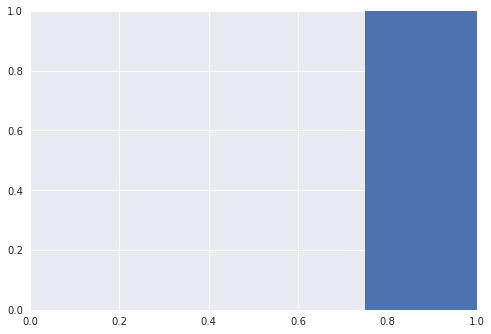

In [18]:
interviews_df[['year','month']].plot(kind='bar')

In [48]:
apps_df.describe()

,anomes,ctipo_movimento,ute_id,cdeficiencia,cnp_pretendida,cpp_pretendida,ccategoria,candidatura_motivo_inscricao,candidatura_int_tempo_nao_insc,candidatura_prof_pret_tempo_pratica,...,ute_curso_ano_conclusão,cae_anterior,ute_idade,conjuge_categoria,conjuge_motivo_indisponibilidade,candidatura_categoria_anterior,ute_nr_pessoas_cargo,ute_nr_descendentes_cargo,year,month
count,125029.000000,125029.0,1.250290e+05,125029.000000,111702.000000,42412.000000,125029.000000,125029.000000,78703.000000,113451.000000,...,22613.000000,110729.000000,125029.000000,1246.000000,24.000000,49751.000000,73390.000000,63239.000000,125029.000000,125029.000000
mean,201193.832015,11.0,3.657269e+06,1.139376,534564.843369,51928.425964,1.940478,9.060770,21.983355,72.501996,...,2000.379339,42684.005644,36.448896,2.301766,1.791667,2.037346,1.212100,0.817771,2011.876197,6.212343
std,290.677615,0.0,1.572727e+06,8.635790,236583.620475,25032.567888,0.394164,10.698637,29.131316,94.068923,...,81.616173,31747.385921,12.080153,1.010998,0.883627,0.515384,3.705312,3.951743,2.908707,3.508687
min,200701.000000,11.0,7.100000e+02,0.000000,315.000000,13.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2007.000000,1.000000
25%,200911.000000,11.0,2.451257e+06,0.000000,342210.000000,32560.000000,2.000000,6.000000,3.000000,11.000000,...,1999.000000,9609.000000,26.000000,2.000000,1.000000,2.000000,0.000000,0.000000,2009.000000,3.000000
50%,201206.000000,11.0,3.909178e+06,0.000000,512320.000000,51320.000000,2.000000,8.000000,10.000000,36.000000,...,2006.000000,47111.000000,35.000000,2.000000,1.500000,2.000000,1.000000,0.000000,2012.000000,6.000000
75%,201411.000000,11.0,4.756382e+06,0.000000,714105.000000,71311.000000,2.000000,8.000000,29.000000,100.000000,...,2010.000000,73110.000000,45.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2014.000000,9.000000
max,201704.000000,11.0,6.550048e+06,99.000000,999999.000000,96292.000000,4.000000,99.000000,191.000000,989.000000,...,2017.000000,99000.000000,99.000000,7.000000,3.000000,5.000000,99.000000,99.000000,2017.000000,12.000000


In [16]:
conv_df.head[conv_df['convocatoria_resultado']==10]

TypeError: 'instancemethod' object has no attribute '__getitem__'

In [77]:
#conv_df.groupby(['dtipo_convocatoria','dresultado_convocatoria']).ute_id.count()

In [ ]:
#find count of variable options
DataFrame(interviews_df.groupby('dresultado_apresentacao').ute_id.count().sort_values(ascending=False).apply(lambda x: x*100/len(interviews_df)))


In [17]:
# list of unique IDs
users_list = apps_df.drop_duplicates('ute_id',keep='first')['ute_id']
cancel_users_list = cancel_df.drop_duplicates('ute_id',keep='first')['ute_id']
cat_changes_users_list = cat_changes_df.drop_duplicates('ute_id',keep='first')['ute_id']
conv_users_list = conv_df.drop_duplicates('ute_id',keep='first')['ute_id']
interventions_users_list = interventions_df.drop_duplicates('ute_id',keep='first')['ute_id']
interviews_users_list = interviews_df.drop_duplicates('ute_id',keep='first')['ute_id']

len(users_list)

65523

In [18]:
# create dataframe with one row per user that submitted an application
users_df = DataFrame(users_list)

In [19]:
users_df['cancellations'] = users_df['ute_id'].apply(lambda x: x in cancel_users_list)
users_df['convocations'] = users_df['ute_id'].apply(lambda x: x in conv_users_list)
users_df['cat_changes'] = users_df['ute_id'].apply(lambda x: x in cat_changes_users_list)
users_df['interventions'] = users_df['ute_id'].apply(lambda x: x in interventions_users_list)

In [96]:
user_counts = DataFrame(apps_df.ute_id.value_counts())
user_counts_cancel = cancel_df.ute_id.value_counts()

In [105]:
user_counts['cancellations'] = user_counts.index
user_counts.head()

,ute_id,cancellations
2334945,35,2334945
5745193,30,5745193
2981696,20,2981696
3672353,18,3672353
2433439,17,2433439


In [98]:
#user_counts['cancellations']=user_counts_cancel[user_counts['cancellations']]

In [78]:
cancel_df.head()

,anomes,ctipo_movimento,dtipo_movimento,ute_id,anulacao_motivo,dmotivo_anulacao,anulacao_data
0,200701,31,ANULAÃÃES AO LONGO DO MÃS,1068894,20,"COLOCAÃÃO POR MEIOS PRÃPRIOS, POR CONTA DE ...",2007-01-25 00:00:00
1,200701,31,ANULAÃÃES AO LONGO DO MÃS,1100731,14,RECUSA DE INTERVENÃÃO,None
2,200701,31,ANULAÃÃES AO LONGO DO MÃS,1183200,11,FALTA A CONVOCATÃRIA,2007-01-30 11:12:23
3,200701,31,ANULAÃÃES AO LONGO DO MÃS,1218220,12,FALTA AO CONTROLO,2007-01-30 00:00:00
4,200701,31,ANULAÃÃES AO LONGO DO MÃS,1263911,20,"COLOCAÃÃO POR MEIOS PRÃPRIOS, POR CONTA DE ...",2007-01-02 00:00:00


In [86]:
type(user_counts_cancel)

pandas.core.series.Series

In [94]:
user_counts_cancel[[3672353, 3672353]]

3672353    16
3672353    16
Name: ute_id, dtype: int64